# Train and test split + Copying images into train and test folders

## 1. Reload images dataset

In [1]:
import pandas as pd

images_dataset_path = 'data/datasets/images.csv'
df_images = pd.read_csv(images_dataset_path)

display(df_images.columns)
display(df_images.index[:10])

Index(['id_video', 'code', 'folder', 'file_name', 'file_path', 'frame_index',
       'timestamp', 'initial_timestamp', 'seen', 'tags'],
      dtype='object')

RangeIndex(start=0, stop=10, step=1)

## 2. Preprocess the dataset

In [2]:
from modules.octa_video_util import _assign_tag
from modules.octa_video_util import filter_by_query

#### Create categorical field from tag priority list

In [3]:
# Create unique tag column based on class priority list
default_tag = 'normal'
tags_priority_list = ['alagamento', 'bolsão', 'lâmina', 'poça', 'transbordo']

df_images['tag'] = df_images['tags'].apply(lambda tags_list: _assign_tag(tags_list, tags_priority_list, default_tag))
display(df_images.tag.value_counts())

tag
normal        147594
poça           67391
lâmina          8759
alagamento      4335
bolsão          4235
transbordo      2237
Name: count, dtype: int64

#### Drop categories

In [4]:
df_images = df_images[df_images['tag'] != 'transbordo']

#### Binarize categorical variable

In [5]:
target_classes = ['lâmina', 'bolsão', 'alagamento']

# Binarize categorical variable from list of target classes
df_images['flood'] = df_images['tag'].isin(target_classes).astype(int)

display(df_images['flood'].value_counts())
print()
display(df_images.index[:10])

flood
0    214985
1     17329
Name: count, dtype: int64

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

#### Filter images

In [6]:
query_params = {'seen': True}

# Filter dataset of images by query
df_sample = filter_by_query(df_images, query_params).copy()

display(df_sample['flood'].value_counts())
print()
display(df_sample.index[:10])

flood
0    214985
1     17329
Name: count, dtype: int64

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

---
## 4. Shuffling

In [3]:
import numpy as np
import secrets
secrets.randbits(128)

def RNG():
    return np.random.default_rng(122807528840384100672342137672332424406)

# Example usage
# rng = RNG()
# idx = rng.choice(data.index, len(data), replace=replace, shuffle=False)

#### Sampling parameters

In [4]:
target_variable = 'flood'
multiclass_target_variable = 'tag'
groups_variable = 'code'

max_samples = 2000
replace = False
random_state = 0

#### Shuffle Samples

In [9]:
data = df_sample.copy()

data = data.sample(n=len(data), replace=replace, random_state=random_state)

display(data.index[:10])

Index([117849, 140116, 22843, 90909, 112686, 5198, 213855, 197013, 179200,
       168345],
      dtype='int64')

#### Get x and y (features and target variable)

In [10]:
# Get x and y
X = data.drop(target_variable, axis=1)
Y = data[target_variable].copy()

Y_multi = data[multiclass_target_variable] 
groups = data[groups_variable].copy()

display(Y.value_counts())
print()
display(Y_multi.value_counts())


flood
0    214985
1     17329
Name: count, dtype: int64

tag
normal        147594
poça           67391
lâmina          8759
alagamento      4335
bolsão          4235
Name: count, dtype: int64

---
## Undersampling separately for minority and majority classes

<strong>Obs: Choose one of the following three options</strong>

##### Optional · Under sampling between subclasses of the majority class only

Best result

In [11]:
# from imblearn.under_sampling import RandomUnderSampler

# rus = RandomUnderSampler(sampling_strategy='auto', random_state=random_state, replacement=replace)

# x_res, y_multi_res = rus.fit_resample(X[Y==0], Y_multi[Y==0])
# x_res = pd.concat([x_res, X[Y==1]])
# y_multi_res = pd.concat([y_multi_res, Y_multi[Y==1]])
# y_res = Y.loc[y_multi_res.index]

# display(y_multi_res.value_counts())
# print()
# display(y_res.value_counts())
# print()
# display(y_res.index)

##### Optional · Under sampling between subclasses of the minority class only

In [12]:
# from imblearn.under_sampling import RandomUnderSampler

# rus = RandomUnderSampler(sampling_strategy='auto', random_state=random_state, replacement=replace)

# x_res, y_multi_res = rus.fit_resample(X[Y==1], Y_multi[Y==1])
# x_res = pd.concat([x_res, X[Y==0]])
# y_multi_res = pd.concat([y_multi_res, Y_multi[Y==0]])
# y_res = Y.loc[y_multi_res.index]

# display(y_multi_res.value_counts())
# print()
# display(y_res.value_counts())
# print()
# display(y_res.index)

##### Optional · Under sampling between subclasses of the minority/majority classes separately

In [13]:
# from imblearn.under_sampling import RandomUnderSampler

# rus = RandomUnderSampler(sampling_strategy='auto', random_state=random_state, replacement=replace)

# x_res, y_multi_res = rus.fit_resample(X[Y==1], Y_multi[Y==1])
# x_res_majority, y_res_majority = rus.fit_resample(X[Y==0], Y_multi[Y==0])
# x_res = pd.concat([x_res, x_res_majority])
# y_multi_res = pd.concat([y_multi_res, y_res_majority])
# y_res = Y.loc[y_multi_res.index]

# display(y_multi_res.value_counts())
# print()
# display(y_res.value_counts())
# print()
# display(y_res.index)

---
## Undersampling binary classes

In [14]:
# rus = RandomUnderSampler(sampling_strategy='auto', random_state=random_state, replacement=replace)

# x_res, y_res = rus.fit_resample(x_res, y_res)

# groups_res = groups.loc[y_res.index].copy()
# y_multi_res = Y_multi.loc[y_res.index].copy()

# print('Total samples:', len(y_res))
# print()
# display(y_res.value_counts())
# print()
# print(y_multi_res.value_counts())
# print()
# display(y_res.index)

#### Optional · Sampling based on `max_samples`

In [15]:
# y_res = pd.concat([
#     y_res[y_res == 0].sample(int(max_samples / 2), replace=replace, random_state=random_state),
#     y_res[y_res == 1].sample(int(max_samples / 2), replace=replace, random_state=random_state)
# ], axis=0)

# x_res = X.loc[y_res.index].copy()
# groups_res = groups.loc[y_res.index].copy()

# display(y_res.value_counts())
# print()
# display(y_res.index)

---
### Even Group Undersample

In [16]:
import numpy as np

def group_even_undersample(x, y, groups, prct=0.5, n=None, random_state=None):
    group_cnt = groups.value_counts()
    if n is None:
        n = int(np.percentile(group_cnt, prct * 100))
    index = []
    for group in group_cnt.index:
        index += y[groups == group].sample(min(n, group_cnt[group]), replace=False, random_state=random_state).index.tolist()
    return x.loc[index], y.loc[index]

#### Undersample single class evenly · keeping all positive samples

In [17]:
subsample_index = []

class_df = df_sample[df_sample['tag'] == 'poça']
x_cls = class_df.drop('flood', axis=1)
y_cls = class_df['flood']
groups_cls = class_df['code']

x_cls_res, y_cls_res = group_even_undersample(x_cls, y_cls, groups_cls, n=54, random_state=random_state)
subsample_index += y_cls_res.index.tolist()

class_df = df_sample[df_sample['tag'] == 'normal']
x_cls = class_df.drop('flood', axis=1)
y_cls = class_df['flood']
groups_cls = class_df['code']

x_cls_res, y_cls_res = group_even_undersample(x_cls, y_cls, groups_cls, n=37, random_state=random_state)
subsample_index += y_cls_res.index.tolist()

majority_samples = df_sample.loc[subsample_index]
sample_even = pd.concat([majority_samples, df_sample[df_sample['flood'] == 1.0]])

display(sample_even['flood'].value_counts())
print()
display(sample_even['tag'].value_counts())
print()
display(sample_even.index)

flood
1    17329
0    10851
Name: count, dtype: int64

tag
lâmina        8759
normal        5678
poça          5173
alagamento    4335
bolsão        4235
Name: count, dtype: int64

Index([209703, 210828, 209407, 213035, 212715, 214664, 212996, 184137, 205507,
       209509,
       ...
       234482, 234483, 234484, 234485, 234486, 234487, 234488, 234489, 234490,
       234491],
      dtype='int64', length=28180)

#### One more time · Account for `max_samples`

In [18]:
subsample_index = []

class_df = sample_even[sample_even['flood'] == 0.0]
x_cls = class_df.drop('flood', axis=1)
y_cls = class_df['flood']
groups_cls = class_df['code']

x_cls_res, y_cls_res = group_even_undersample(x_cls, y_cls, groups_cls, n=6, random_state=random_state)
subsample_index += y_cls_res.index.tolist()

class_df = sample_even[sample_even['flood'] == 1.0]
x_cls = class_df.drop('flood', axis=1)
y_cls = class_df['flood']
groups_cls = class_df['code']

x_cls_res, y_cls_res = group_even_undersample(x_cls, y_cls, groups_cls, n=34, random_state=random_state)
subsample_index += y_cls_res.index.tolist()

subsample_even = sample_even.loc[subsample_index]

print()
display(subsample_even['flood'].value_counts())
print()
display(subsample_even['tag'].value_counts())
print()
display(subsample_even.index)

flood
0    1158
1    1083
Name: count, dtype: int64

tag
normal        639
lâmina        528
poça          519
alagamento    290
bolsão        265
Name: count, dtype: int64

Index([209407, 209492, 163510, 162890, 160977, 212997,  19005,  18872,  18992,
        18890,
       ...
       188825, 188836, 188832, 188824, 188830, 188833, 188826, 188823, 188828,
       188835],
      dtype='int64', length=2241)

#### Final distribution of samples per camera

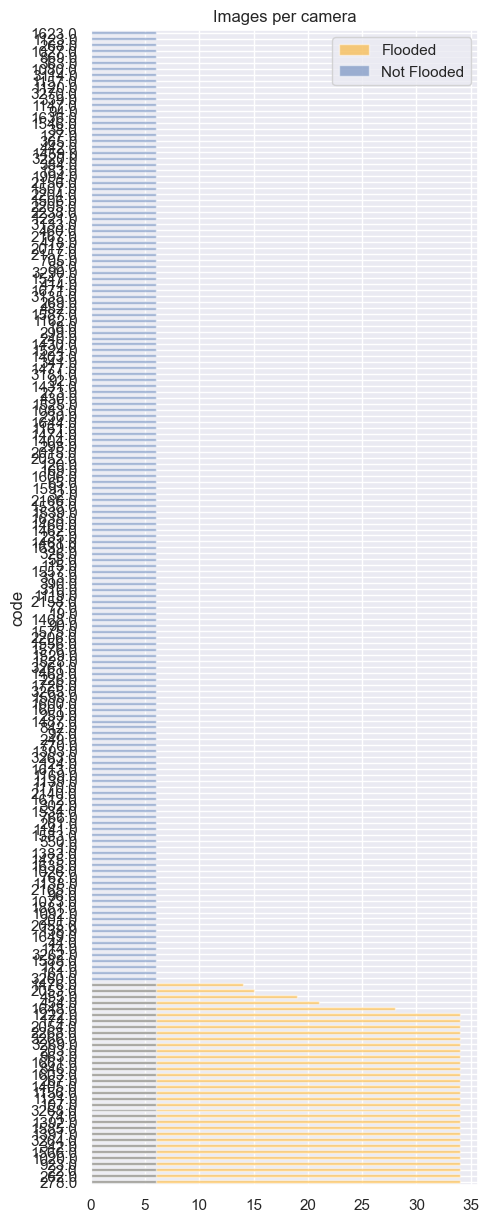

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

fig = plt.figure(figsize=(5, 15))
ax = subsample_even[subsample_even['flood'] == 1.0]['code'].value_counts().plot.barh(label='Flooded', color='orange', alpha=0.5)
subsample_even[subsample_even['flood'] == 0.0]['code'].value_counts().plot.barh(label='Not Flooded', alpha=0.5, ax=ax)

# majority = subsample_even[subsample_even['flood'] == 0.0]
# majority[majority['tag'] == 'poça']['code'].value_counts().plot.barh(label='Not Flooded (Pud)', color='green', alpha=0.5, ax=ax)
# majority[majority['tag'] == 'normal']['code'].value_counts().plot.barh(label='Not Flooded (Normal)', alpha=0.5, ax=ax)

plt.title('Images per camera')
plt.legend()
plt.show()

#### Final undersample variables

In [20]:
x_res = subsample_even.drop('flood', axis=1)
y_res = subsample_even['flood'].copy()
groups_res = subsample_even['code'].copy()

---
### Undersample per camera

In [21]:
code_cnt = groups.value_counts()

code_cnt

code
278.0     21972
326.0     11466
235.0      9632
3261.0     8720
3181.0     7378
          ...  
1139.0       17
1169.0       17
1613.0       16
124.0        14
1623.0        8
Name: count, Length: 193, dtype: int64

In [22]:
codes_1 = groups[Y == 1].unique()

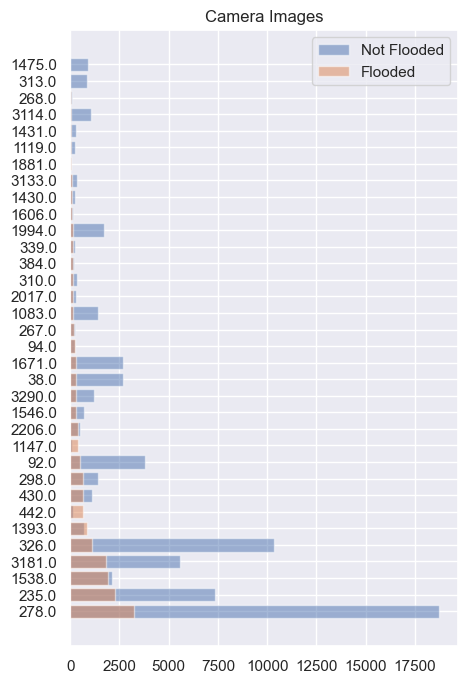

In [23]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5, 8))

cnt_0 = df_sample[df_sample['flood'] == 0]['code'].value_counts()
cnt_1 = df_sample[df_sample['flood'] == 1]['code'].value_counts()

for idx in cnt_1.index:
    if idx not in cnt_0.index:
        cnt_0[idx] = 0
        
cnt_0 = cnt_0.loc[cnt_1.index]

# Plot bars with transparency
plt.barh(cnt_0.index.astype(str), cnt_0.values, alpha=0.5, label='Not Flooded')  # Set transparency to 0.5
plt.barh(cnt_1.index.astype(str), cnt_1.values, alpha=0.5, label='Flooded')  # Set transparency to 0.5

plt.title('Camera Images')
plt.legend()  # Show legend
# plt.ylim(-2, len(cnt_0) + 1)

plt.show()


In [36]:
df_sample.head()

,id_video,code,folder,file_name,file_path,frame_index,timestamp,initial_timestamp,seen,tags,tag,flood
0,65040934f049f672e58adc3b,1461.0,comando/alagamento/101579/1461/CODE1461 2023-0...,CODE1461 2023-08-28 23-30-02-0.jpg,comando/alagamento/101579/1461/CODE1461 2023-0...,0,2023-08-28 23:30:02.0,2023-08-28 23:30:02,True,['poça'],poça,0
1,65040934f049f672e58adc3b,1461.0,comando/alagamento/101579/1461/CODE1461 2023-0...,CODE1461 2023-08-28 23-30-02-3.jpg,comando/alagamento/101579/1461/CODE1461 2023-0...,1,2023-08-28 23:30:02.3,2023-08-28 23:30:02,True,['poça'],poça,0
2,65040934f049f672e58adc3b,1461.0,comando/alagamento/101579/1461/CODE1461 2023-0...,CODE1461 2023-08-28 23-30-02-6.jpg,comando/alagamento/101579/1461/CODE1461 2023-0...,2,2023-08-28 23:30:02.6,2023-08-28 23:30:02,True,['poça'],poça,0
3,65040934f049f672e58adc3b,1461.0,comando/alagamento/101579/1461/CODE1461 2023-0...,CODE1461 2023-08-28 23-30-02-9.jpg,comando/alagamento/101579/1461/CODE1461 2023-0...,3,2023-08-28 23:30:02.9,2023-08-28 23:30:02,True,['poça'],poça,0
4,65040934f049f672e58adc3b,1461.0,comando/alagamento/101579/1461/CODE1461 2023-0...,CODE1461 2023-08-28 23-30-03-3.jpg,comando/alagamento/101579/1461/CODE1461 2023-0...,4,2023-08-28 23:30:03.3,2023-08-28 23:30:02,True,['poça'],poça,0


In [35]:
camera_code_only_class_1 = df_sample[df_sample.flood == 1]['code'].unique()
print(f'{len(camera_code_only_class_1)} unique cameras with flooded images')
camera_code_only_class_1

34 unique cameras with flooded images


array([3114., 2017., 1430., 1431.,   94.,  384.,  310., 1147., 2206.,
       1546., 1606.,  268., 1994., 3290.,   38., 1881.,  430.,  442.,
       1393., 1671.,  298., 3133., 3181., 1538.,  278.,  235.,  326.,
       1119.,  339.,   92., 1083.,  267., 1475.,  313.])

In [37]:
df_code_has_class_1 = df_sample[df_sample['code'].isin(camera_code_only_class_1)]

In [49]:
import random

for code in df_code_has_class_1.code.unique():
    n_class_0 = df_code_has_class_1[(df_code_has_class_1.code == code) & (df_code_has_class_1.flood == 0)].shape[0]
    n_class_1 = df_code_has_class_1[(df_code_has_class_1.code == code) & (df_code_has_class_1.flood == 1)].shape[0]
    flood_value = 1
    if n_class_0 > n_class_1:
        flood_value = 0
    diff = abs(n_class_0 - n_class_1)
    while diff > 0:
        idx_list =  df_code_has_class_1[(df_code_has_class_1.code == code) & (df_code_has_class_1.flood == flood_value)].index
        df_code_has_class_1 = df_code_has_class_1.drop(random.choice(idx_list))
        diff = diff - 1
                

1042
315
232
277
225
180
360
105
517
720
127
69
1708
1191
2700
45
1110
157
690
2700
1403
7366
1405
360
5578
2120
18734
10354
3791
884
850
264
249
228


In [50]:
count_by_code = df_code_has_class_1.groupby('code')['flood'].value_counts().unstack(fill_value=0)
count_by_code

flood,0,1
code,,
38.0,270,270
92.0,516,516
94.0,225,225
235.0,2266,2266
267.0,210,210
268.0,19,19
278.0,3238,3238
298.0,630,630
310.0,135,135


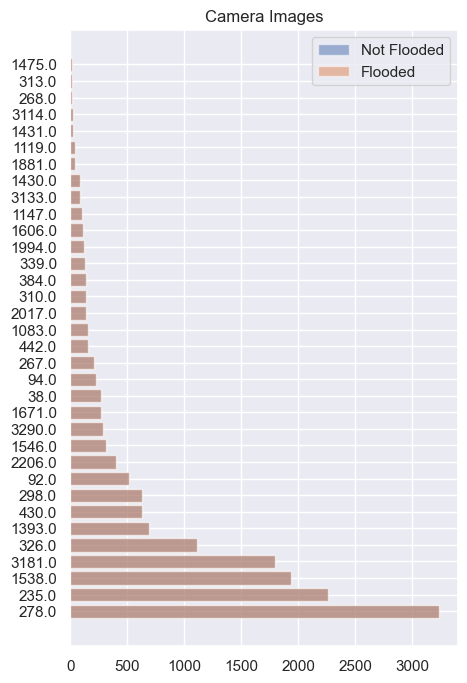

In [53]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5, 8))

cnt_0_n = df_code_has_class_1[df_code_has_class_1['flood'] == 0]['code'].value_counts()
cnt_1_n = df_code_has_class_1[df_code_has_class_1['flood'] == 1]['code'].value_counts()

for idx in cnt_1_n.index:
    if idx not in cnt_0_n.index:
        cnt_0_n[idx] = 0
        
cnt_0_n = cnt_0_n.loc[cnt_1_n.index]

# Plot bars with transparency
plt.barh(cnt_0_n.index.astype(str), cnt_0_n.values, alpha=0.5, label='Not Flooded')  # Set transparency to 0.5
plt.barh(cnt_1_n.index.astype(str), cnt_1_n.values, alpha=0.5, label='Flooded')  # Set transparency to 0.5

plt.title('Camera Images')
plt.legend()  # Show legend
# plt.ylim(-2, len(cnt_0) + 1)

plt.show()


In [52]:
df_code_has_class_1.to_csv('even_classes.csv')

---
## 5. Train and Test Splitting

#### Optional · Train test split

In [24]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, Y_train, Y_test = train_test_split(x_res, y_res, test_size=0.3, shuffle=True, stratify=y_res, random_state=random_state)
# train_index, test_index = Y_train.index, Y_test.index

####  Optional · Stratified group KFold split

Obs: Best split result

In [25]:
from sklearn.model_selection import StratifiedGroupKFold

# Stratified group KFold testing  split
sgkf = StratifiedGroupKFold(n_splits=10, shuffle=False, random_state=None)
for i, (train_index, test_index) in enumerate(sgkf.split(x_res, y_res, groups_res)):
    # Get first split folder
    break

X_train = x_res.iloc[train_index]
Y_train = y_res.iloc[train_index]
groups_train = groups_res.iloc[train_index]

X_test = x_res.iloc[test_index]
Y_test = y_res.iloc[test_index]
groups_test = groups_res.iloc[test_index]

# Stratified group KFold validation split
sgkf = StratifiedGroupKFold(n_splits=9, shuffle=False, random_state=None)
for i, (train_index, val_index) in enumerate(sgkf.split(X_train, Y_train, groups_train)):
    break

X_val = X_train.iloc[val_index]
Y_val = Y_train.iloc[val_index]
groups_val = groups_train.iloc[val_index]

X_train = X_train.iloc[train_index]
Y_train = Y_train.iloc[train_index]
groups_train = groups_train.iloc[train_index]

print('Train index:', Y_train.index[:10])
print('Test index:', Y_test.index[:10])
print('Val index:', Y_val.index[:10])

Train index: Index([209407, 209492, 163510, 162890, 160977, 212997, 19005, 18872, 18992,
       18890],
      dtype='int64')
Test index: Index([76703, 84155, 84064, 150887, 84280, 88649, 30128, 30113, 30135, 30102], dtype='int64')
Val index: Index([188546, 203829, 188545, 182369, 188569, 203828, 45963, 45994, 56109,
       56126],
      dtype='int64')


#### Optional · Group shuffle split

In [26]:
# # NOTE: This split is not deterministic even using random_state!=None
# # NOTE: This split is not stratified
# from sklearn.model_selection import GroupShuffleSplit

# # Group shuffle split
# gss = GroupShuffleSplit(n_splits=1, random_state=random_state, test_size=0.2)

# # Get first split folder
# for i, (train_index, test_index) in enumerate(gss.split(x_res, y_res, groups_res)):
#     break

# X_train = x_res.iloc[train_index]
# X_test = x_res.iloc[test_index]

# Y_train = y_res.iloc[train_index]
# Y_test = y_res.iloc[test_index]

#### Report group count and train and test samples for each class (Missing reporting per group class)

In [27]:
def group_split_report(y_res, groups_res, Y_train, Y_test, Y_val):

    train_prct = len(Y_train) / len(y_res)
    test_prct = len(Y_test) / len(y_res)
    val_prct = len(Y_val) / len(y_res)
    groups_train = groups_res.loc[Y_train.index].unique()
    groups_test = groups_res.loc[Y_test.index].unique()
    groups_val = groups_res.loc[Y_val.index].unique()
    class_count = y_res.value_counts()
    train_class_count = Y_train.value_counts()
    test_class_count = Y_test.value_counts()
    val_class_count = Y_val.value_counts()
    train_class_prct = [train_class_count[0] / class_count[0], train_class_count[1] / class_count[1]]
    test_class_prct = [test_class_count[0] / class_count[0], test_class_count[1] / class_count[1]]
    val_class_prct = [val_class_count[0] / class_count[0], val_class_count[1] / class_count[1]]
    train_class_ratio = round(Y_train.value_counts(normalize=True).loc[0] * 100, 2)
    test_class_ratio = round(Y_test.value_counts(normalize=True).loc[0] * 100, 2)
    val_class_ratio = round(Y_val.value_counts(normalize=True).loc[0] * 100, 2)
    
    print('Groups intersecting train and test sets:', len(set(groups_train).intersection(groups_test)))
    print('Groups intersecting train and val sets:', len(set(groups_train).intersection(groups_val)))
    print('Groups intersecting test and val sets:', len(set(groups_test).intersection(groups_val)))
    print()
    
    stats = pd.DataFrame(
        [[len(groups_train), len(groups_test), len(groups_val)],
        [len(Y_train), len(Y_test), len(Y_val)],
        [round(train_prct * 100, 2), round(test_prct * 100, 2), round(val_prct * 100, 2)],
        [train_class_count[0], test_class_count[0], val_class_count[0]],
        [train_class_count[1], test_class_count[1], val_class_count[1]],
        [round(train_class_prct[0] * 100, 2), round(test_class_prct[0] * 100, 2), round(val_class_prct[0] * 100, 2)],
        [round(train_class_prct[1] * 100, 2), round(test_class_prct[1] * 100, 2), round(val_class_prct[1] * 100, 2)],
        [train_class_ratio, test_class_ratio, val_class_ratio]],
        columns=['train', 'test', 'val'], index=['groups', 'total', 'total (%)', '0', '1', '0 (%)', '1 (%)', 'class ratio (%)']
    ).T

    return stats


# Example usage

print('Total samples:', len(y_res))
stats = group_split_report(y_res, groups_res, Y_train, Y_test, Y_val)
display(stats)

Total samples: 2241
Groups intersecting train and test sets: 0
Groups intersecting train and val sets: 0
Groups intersecting test and val sets: 0



,groups,total,total (%),0,1,0 (%),1 (%),class ratio (%)
train,155.0,1776.0,79.25,930.0,846.0,80.31,78.12,52.36
test,19.0,235.0,10.49,114.0,121.0,9.84,11.17,48.51
val,19.0,230.0,10.26,114.0,116.0,9.84,10.71,49.57


---
## 6. Copy images into train and test folders

#### Copy images with `train_index`and `test_index` into structured 'train' and 'test' folders

In [5]:
### MY CODE :)
df_200 = pd.read_csv('even_classes_200.csv')
count_by_code = df_200.groupby('code')['flood'].value_counts().unstack(fill_value=0)
import math
quant_training = math.floor(0.8 * count_by_code[0].sum())
used_indexes = []
not_used_indexes = []
sum = 0
for idx, row in count_by_code.iterrows():
    if sum + row[0] <= quant_training:
        sum += row[0]
        used_indexes.append(idx)
    else:
        not_used_indexes.append(idx)
print(sum)
print(f'Rows used: {used_indexes}')
print(f'number of rows used: {len(used_indexes)}')
print(f'Rows not used: {not_used_indexes}')

3795
Rows used: [38.0, 92.0, 94.0, 235.0, 267.0, 268.0, 278.0, 298.0, 310.0, 313.0, 326.0, 339.0, 384.0, 430.0, 442.0, 1083.0, 1119.0, 1147.0, 1393.0, 1430.0, 1431.0, 1475.0, 1538.0, 1546.0, 1606.0, 1671.0, 1881.0, 3114.0]
number of rows used: 28
Rows not used: [1994.0, 2017.0, 2206.0, 3133.0, 3181.0, 3290.0]


In [6]:
code_val = not_used_indexes[:3]
code_test = not_used_indexes[3:]

In [17]:
df_200[df_200['code'].isin(used_indexes)].index

Index([   0,    1,    2,    4,    6,    7,    8,   10,   11,   12,
       ...
       9484, 9486, 9487, 9490, 9491, 9492, 9494, 9495, 9496, 9497],
      dtype='int64', length=7590)

In [22]:
from modules.octa_video_util import copy_images_to_folders

base_directory = 'data/images'
# target_directory = 'data/splits/sgkf-8-1-1'
target_directory = 'data/datasets/splits/even-classes-200'

# dataset = data.copy()
dataset = df_200.copy()

file_path_field = 'file_path'
label_field = 'flood'

# train_indexes = list(Y_train.index)
# test_indexes = list(Y_test.index)
# val_indexes = list(Y_val.index)

train_indexes = list(df_200[df_200['code'].isin(used_indexes)].index)
test_indexes = list(df_200[df_200['code'].isin(code_test)].index)
val_indexes = list(df_200[df_200['code'].isin(code_val)].index)

copy_images_to_folders(
    base_directory, target_directory, dataset,
    train_indexes, test_indexes, val_indexes,
    file_path_field=file_path_field, tag_field=label_field
)

Copying images to train folders:
Processed 7590/7590 files (100.00%) - Found: 7590/7590
Copying images to test folders:
Processed 980/980 files (100.00%) - Found: 980/980
Copying images to val folders:


#### Save dataframe of sample images

In [23]:
#target_directory = 'data/splits/sgkf-8-1-1'
target_directory = 'data/datasets/splits/even-classes-200'

# data_train = data.loc[Y_train.index]
# data_test = data.loc[Y_test.index]
# data_val = data.loc[Y_val.index]

data_train = df_200.loc[train_indexes]
data_test = df_200.loc[test_indexes]
data_val = df_200.loc[val_indexes]

data_train['set'] = 'train'
data_test['set'] = 'test'
data_val['set'] = 'val'

data_split_df = pd.concat([data_train, data_test, data_val])

data_split_df.to_csv(f'{target_directory}/images.csv')
print(f'split dataframe saved with shape: {data_split_df.shape}')

split dataframe saved with shape: (9498, 15)


#### Count save images

In [24]:
import os

target_directory = 'data/datasets/splits/even-classes-200'

print('train:', len(os.listdir(f'{target_directory}/train/0')), len(os.listdir(f'{target_directory}/train/1')))
print('test:', len(os.listdir(f'{target_directory}/test/0')), len(os.listdir(f'{target_directory}/test/1')))
print('val:', len(os.listdir(f'{target_directory}/val/0')), len(os.listdir(f'{target_directory}/val/1')))

train: 3756 3785
test: 490 490
val: 464 464
